# Sequence Models & How to use them

**학습목표**
1. RNN, LSTM, GRU의 구조를 이해한다.
2. 위 모델을 사용하기 위한 데이터 구조를 이해한다.
3. 위 모든 내용을 코딩할 수 있다.

-----------------
* Thanks to : 한기영 대표님 @ Data Insight

## 1.환경 및 데이터 준비

### Import Packages

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error

### Data Loading

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/temperature.csv')
data.head(10)

,year,week,AvgTemp
0,2010,1,-3.000000
1,2010,2,-7.500000
2,2010,3,-7.900000
3,2010,4,-2.357143
4,2010,5,-3.342857
5,2010,6,-1.800000
6,2010,7,-0.314286
7,2010,8,-2.142857
8,2010,9,4.400000
9,2010,10,7.057143


In [3]:
data.tail()

,year,week,AvgTemp
260,2014,49,8.100000
261,2014,50,-4.357143
262,2014,51,-2.142857
263,2014,52,-5.542857
264,2014,53,-0.728571


## 2.데이터 이해

### 탐색하기

온도의 흐름(trend)을 살펴봅시다.

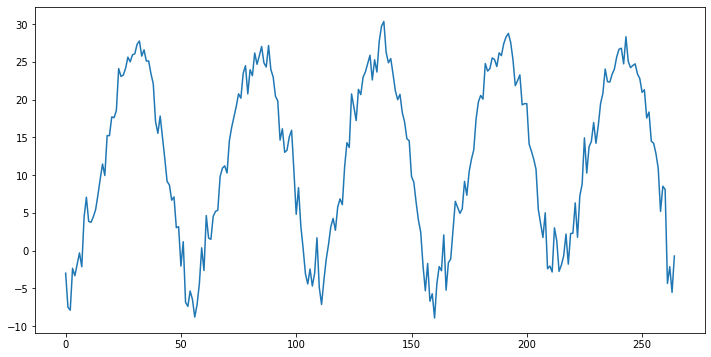

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data.AvgTemp)
plt.show()

##3.데이터 준비

### 불필요한 데이터 정리 

In [5]:
data = data.drop(['year','week'], axis=1)
data.head()

,AvgTemp
0,-3.000000
1,-7.500000
2,-7.900000
3,-2.357143
4,-3.342857


## 4.Sequence 데이터 구조로 만들기

내일의 기온을 예측 하려면?

In [6]:
data = data.values

In [7]:
# 여기에 의미있는 기간(timestep을 지정해 봅시다.)
timestep= 21 # 한 번에 21주씩 고려하자
             # 정확한 표현으로는 timestepsize
'''
data.shape:[100,3]
timestep : 20
x : [], y : []
x = np.array([data[i : i+timestep] for i in range(len(data - timestep))])
y = np.array([data[i+timestep,-1] for i in range(len(data - timestep))])
'''



# x의 데이터 구조를 3차원으로 만들어줘야 합니다.
x = np.array([data[i : i + timestep] for i in range( len(data) - timestep ) ])
y = np.array([data[i + timestep, -1] for i in range( len(data) - timestep ) ])

# 쉬운 버전
# x = [] # x를 담을 빈 공간
# y = [] # y를 담을 빈 공간

# for i in range(len(data) - timestep) :
#     x_temp = data[i:i+timestep, :]  # 21개 시점으로 끊어, 모든 컬럼
#     y_temp = data[i:timestep,-1]
#     x.append(x_temp)
#     y.append(y_temp)
# x = np.array(x)
# y = np.array(y)

x_train, x_val, x_test = x[:160], x[160:200], x[200:]
y_train, y_val, y_test = y[:160], y[160:200], y[200:]

print(x.shape, y.shape)
print('-------------------------------')
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)
print('-------------------------------')
print('[ # , timestep, feature수 ] <-- 데이터의 구조 : ')

(244, 21, 1) (244,)
-------------------------------
(160, 21, 1) (160,)
(40, 21, 1) (40,)
(44, 21, 1) (44,)
-------------------------------
[ # , timestep, feature수 ] <-- 데이터의 구조 : 


데이터의 구조 : [n, timestep, feature수]

## 5.RNN 모델링

### [실습]무작정 RNN 모델링 수행해보기

In [9]:
x_train.shape, y_train.shape
# x_train의 모양 : 데이터 개수, 한번에 고려할 시점 수, 시점 별 고려할 feature 개수

((160, 21, 1), (160,))

In [22]:
# 1.세션클리어
keras.backend.clear_session()

# 2.Sequential 모델 선언하기
model = keras.models.Sequential()

# 3. 레이어 쌓기 SimpleRNN의 default activation은 'tanh' 입니다.
# input_shape = [timestep, feature수]
# simplernn의 히든스테이트 노드는 16개로 작성해 봅시다.
model.add(tf.keras.layers.Input(shape = (21, 1)))
model.add(keras.layers.SimpleRNN(  16   , activation = 'tanh' ) )
model.add(   keras.layers.Dense(1)   )

# compile
model.compile( loss = 'mae',  # 'mse' 대비, '급격한 학습을 막는데' 종종 사용이 됨
              optimizer = 'adam')

# 학습
history = model.fit( x_train , y_train  , epochs = 30 , validation_data=(x_val, y_val))

Epoch 1/30
5/5 [==============================] - 2s 104ms/step - loss: 14.6097 - val_loss: 15.1775
Epoch 2/30
5/5 [==============================] - 0s 20ms/step - loss: 14.4848 - val_loss: 15.0914
Epoch 3/30
5/5 [==============================] - 0s 18ms/step - loss: 14.3613 - val_loss: 15.0094
Epoch 4/30
5/5 [==============================] - 0s 13ms/step - loss: 14.2517 - val_loss: 14.9293
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 14.1354 - val_loss: 14.8579
Epoch 6/30
5/5 [==============================] - 0s 11ms/step - loss: 14.0311 - val_loss: 14.7906
Epoch 7/30
5/5 [==============================] - 0s 11ms/step - loss: 13.9229 - val_loss: 14.7244
Epoch 8/30
5/5 [==============================] - 0s 15ms/step - loss: 13.8210 - val_loss: 14.6587
Epoch 9/30
5/5 [==============================] - 0s 12ms/step - loss: 13.7198 - val_loss: 14.5933
Epoch 10/30
5/5 [==============================] - 0s 12ms/step - loss: 13.6243 - val_loss: 14.5273
Epoch 11

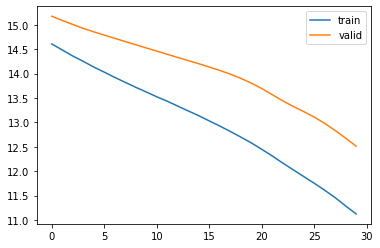

In [23]:
# 학습 곡선을 그려봅시다.
plt.plot(history.history["loss"], label = 'train')
plt.plot(history.history["val_loss"], label = 'valid')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error as MSE

In [25]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
y_pred = model.predict(x_test)

RMSE = MSE(y_test, y_pred) ** 0.5


2/2 [==============================] - 0s 7ms/step


In [26]:
RMSE

15.474986397297197

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 16)                288       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


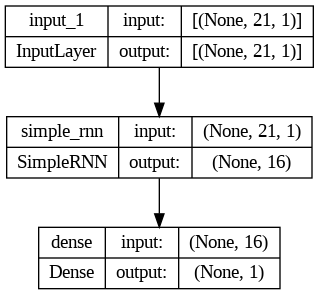

In [28]:
plot_model(model, show_shapes=True)

### More Exercises

1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : SimpleRNN
    * 히든스테이트 노드 16개, return_sequences=True
3. 두번째 히든레이어 : SimpleRNN
    * 히든스테이트 노드 32개, return_sequences=True
4. 플래튼
5. 회귀를 위한 적절한 아웃풋 레이어

In [30]:
x_train.shape, y_train.shape

((160, 21, 1), (160,))

In [31]:
import tensorflow
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, SimpleRNN
from keras.models import Model
from keras.backend import clear_session

import numpy as np

In [32]:
####################
## Your Code Here ##
####################
# 1. 이전 모델 클리어
clear_session()
# 2. 모델 엮기
il = Input(shape = (21, 1))

hl = SimpleRNN(16, return_sequences=True)(il)
hl = SimpleRNN(32, return_sequences=True)(hl)

hl = Flatten()(hl)

ol = Dense(1)(hl)

# 3. 모델 생성
model = Model(il, ol)
# 4. 모델 컴파일
model.compile(loss = 'mae', optimizer = 'adam')
# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 21, 16)            288       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 21, 32)            1568      
                                                                 
 flatten (Flatten)           (None, 672)               0         
                                                                 
 dense (Dense)               (None, 1)                 673       
                                                                 
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   restore_best_weights = True)

In [37]:
## 학습도 시킬 것
model.fit(x_train, y_train, epochs = 100, validation_split = 0.2, callbacks = [es], verbose = 1)


Epoch 1/100
4/4 [==============================] - 0s 30ms/step - loss: 8.2667 - val_loss: 10.2073
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 7.9566 - val_loss: 10.1884
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 7.6421 - val_loss: 10.0131
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 7.3162 - val_loss: 9.5858
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 7.0329 - val_loss: 9.1598
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 6.7407 - val_loss: 8.6974
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 6.4281 - val_loss: 8.1668
Epoch 8/100
4/4 [==============================] - 0s 19ms/step - loss: 6.1668 - val_loss: 7.7586
Epoch 9/100
4/4 [==============================] - 0s 17ms/step - loss: 5.9547 - val_loss: 7.2796
Epoch 10/100
4/4 [==============================] - 0s 22ms/step - loss: 5.7080 - val_loss: 6.9380
Epoch 11/100
4/4

In [39]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [41]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
from sklearn.metrics import mean_squared_error as MSE

RMSE = MSE(y_test, y_pred) ** 0.5
RMSE


2.4040535668708065

## 6.LSTM 모델링

1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : LSTM
    * 히든스테이트 노드 16개, return_sequences=True
3. 두번째 히든레이어 : LSTM
    * 히든스테이트 노드 32개, return_sequences=True
4. 플래튼
5. 회귀를 위한 적절한 아웃풋 레이어


In [ ]:
####################
## Your Code Here ##
####################



In [ ]:
## 학습도 시킬 것



In [ ]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.



## 7.GRU 모델링


1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : GRU
    * 히든스테이트 노드 24개, return_sequences=True
3. 두번째 히든레이어 : GRU
    * 히든스테이트 노드 32개
4. 회귀를 위한 적절한 아웃풋 레이어

In [ ]:
####################
## Your Code Here ##
####################



In [ ]:
## 학습도 시킬 것



In [ ]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.

